In [59]:

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [60]:
#hide
from fastai.vision.all import *
from fastbook import *

from fastai.vision.widgets import *
matplotlib.rc('image', cmap='Greys')

In [61]:
path = Path('dbs/images/categorized/')
fns = get_image_files(path)

In [62]:
failed = verify_images(fns)
failed

(#0) []

In [63]:
mush = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224, ResizeMethod.Pad, pad_mode='zeros'))
dls = mush.dataloaders(path)

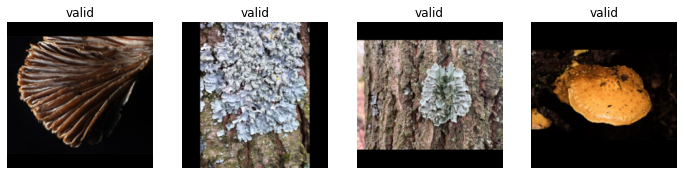

In [64]:
dls.valid.show_batch(max_n=4, nrows=1)

In [65]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.388587,0.337034,0.098413,02:39


epoch,train_loss,valid_loss,error_rate,time
0,0.329033,0.216188,0.053968,03:18
1,0.203151,0.197429,0.050794,03:15
2,0.149283,0.165114,0.041270,03:06
3,0.101942,0.167944,0.044444,03:07


In [66]:
learn.export('clean-res18-2nd.pkl')

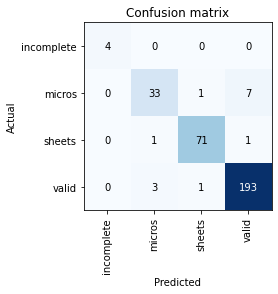

In [67]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [70]:
doc(interp.plot_top_losses)

Interpretation.plot_top_losses(k, largest=True, **kwargs)
Show `k` largest(/smallest) preds and losses. `k` may be int, list, or `range` of desired results.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


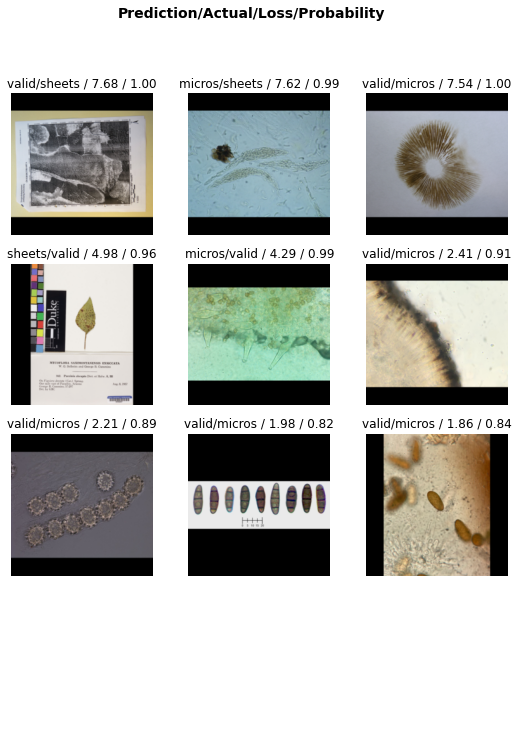

In [71]:
interp.plot_top_losses(26, nrows=4)

In [41]:
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 2.
Original Traceback (most recent call last):
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 39, in fetch
    data = next(self.dataset_iter)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastai/data/load.py", line 136, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastcore/basics.py", line 219, in chunked
    res = list(itertools.islice(it, chunk_sz))
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastai/data/load.py", line 151, in do_item
    try: return self.after_item(self.create_item(s))
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastai/data/load.py", line 158, in create_item
    if self.indexed: return self.dataset[s or 0]
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastai/data/core.py", line 338, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastai/data/core.py", line 338, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastai/data/core.py", line 304, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastai/data/core.py", line 266, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastcore/transform.py", line 200, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastcore/transform.py", line 150, in compose_tfms
    x = f(x, **kwargs)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastcore/transform.py", line 73, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastcore/transform.py", line 83, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastcore/transform.py", line 89, in _do_call
    return retain_type(f(x, **kwargs), x, ret)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastcore/dispatch.py", line 123, in __call__
    return f(*args, **kwargs)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastai/vision/core.py", line 110, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/fastai/vision/core.py", line 85, in load_image
    im = Image.open(fn)
  File "/Users/weishuhn/.pyenv/versions/miniforge3/envs/image-classifier/lib/python3.9/site-packages/PIL/Image.py", line 2953, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/Users/weishuhn/projects/github.com/weishuhn/fungid/dbs/images/categorized/micros/2833499663-1.png'


In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)